# Final Project  
## Azhidarov Abdusamad csse1810

# Data preparation and analisys 

In [382]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import shutil
import random

from PIL import Image

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.cluster import KMeans



### Overview of images

In [43]:
for d in ["accordeon","dombyra","kobyz"]:
    dr = 'C:/Users/admin/Desktop/3rd Course/2ML/final/instrumentos1/'+d
    os.chdir(dr)
    print(os.getcwd())
    COUNT = 1    
    files = dict()
    for f in os.listdir():
        f_name, f_ext = os.path.splitext(f)
        f_name = d + str(COUNT)
        COUNT = COUNT + 1
        
        if f_ext in files.keys():
            files[f_ext] += 1
        else:
            files[f_ext] = 1
        
        
        
        new_name = '{}.{}'.format(f_name,f_ext)
        os.rename(f, new_name)
    print("{}:".format(d), COUNT-1)
    print(files,"\n")        

C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos\accordeon
accordeon: 367
{'.jpg': 72, '.png': 9, '.jfif': 279, '.gif': 3, '.jpeg': 4} 

C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos\dombyra
dombyra: 390
{'.jpg': 67, '.jfif': 304, '.png': 11, '.gif': 1, '.jpeg': 7} 

C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos\kobyz
kobyz: 309
{'.png': 13, '.jfif': 219, '.webp': 1, '.jpg': 69, '.jpeg': 6, '.gif': 1} 



### I hand deleted some images in each class

here im converting '.jfif' files to '.jpg', also deleted few big images as well as some icons not related to any class

In [403]:
dr = 'C:/Users/admin/Desktop/3rd Course/2ML/final/instrumentos1/kobyz'
os.chdir(dr)
yourpath = os.getcwd()
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        print(os.path.join(root, name))
        if os.path.splitext(os.path.join(root, name))[1].lower() == ".jfif":
            if os.path.isfile(os.path.splitext(os.path.join(root, name))[0] + ".jpg"):
                print("A jpeg file already exists for %s" % name)
            else:
                outfile = os.path.splitext(os.path.join(root, name))[0] + ".jpg"
                try:
                    im = Image.open(os.path.join(root, name))
                    print("Generating jpeg for %s" % name)
                    im.thumbnail(im.size)
                    im.save(outfile, "JPEG", quality=100)
                except Exception:
                    print 

C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\0.73125400-1349361020.png
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\0521152a3a364635bbe3551b1e2d2bb9_XL_545x305-q-85.jpg
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\0555.jfif
Generating jpeg for 0555.jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\08-015.jpg
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\080508.jfif
Generating jpeg for 080508.jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\1-760x450.jpg
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\1.jpg
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\11111.jfif
Generating jpeg for 11111.jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\111111111.jfif
Generating jpeg for 111111111.jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\1111111111.jfif
Generating jpeg for 1111111111.jfif
C:\Users\admin\Desktop

C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\images (41).jfif
Generating jpeg for images (41).jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\images (42).jfif
Generating jpeg for images (42).jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\images (43).jfif
Generating jpeg for images (43).jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\images (44).jfif
Generating jpeg for images (44).jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\images (45).jfif
Generating jpeg for images (45).jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\images (46).jfif
Generating jpeg for images (46).jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\images (47).jfif
Generating jpeg for images (47).jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\images (48).jfif
Generating jpeg for images (48).jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos

Generating jpeg for images - 2021-05-13T200626.526.jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\images - 2021-05-13T200626.534.jfif
Generating jpeg for images - 2021-05-13T200626.534.jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\images - 2021-05-13T200626.537.jfif
Generating jpeg for images - 2021-05-13T200626.537.jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\images - 2021-05-13T200626.540.jfif
Generating jpeg for images - 2021-05-13T200626.540.jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\images - 2021-05-13T200626.543.jfif
Generating jpeg for images - 2021-05-13T200626.543.jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\images - 2021-05-13T200626.545.jfif
Generating jpeg for images - 2021-05-13T200626.545.jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\images - 2021-05-13T200626.547.jfif
Generating jpeg for images - 2021-05-13T200626.547.jfif
C:\Users

C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\Без названия (31).jfif
Generating jpeg for Без названия (31).jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\Без названия (4).jfif
Generating jpeg for Без названия (4).jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\Без названия (5).jfif
Generating jpeg for Без названия (5).jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\Без названия (6).jfif
Generating jpeg for Без названия (6).jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\Без названия (7).jfif
Generating jpeg for Без названия (7).jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\Без названия (8).jfif
Generating jpeg for Без названия (8).jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\Без названия (9).jfif
Generating jpeg for Без названия (9).jfif
C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz\Без названия.gif
C:\Users\admin\Deskto

In [446]:
for d in ["accordeon","dombyra","kobyz"]:
    dr = 'C:/Users/admin/Desktop/3rd Course/2ML/final/instrumentos1/'+d
    os.chdir(dr)
    print(os.getcwd())
    COUNT = 1    
    files = dict()
    for f in os.listdir():
        COUNT = COUNT + 1        
        f_name, f_ext = os.path.splitext(f)
        if f_ext in files.keys():
            files[f_ext] += 1
        else:
            files[f_ext] = 1
    print("{}:".format(d), COUNT-1)
    print(files,"\n")  

C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\accordeon
accordeon: 357
{'.jpg': 357} 

C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\dombyra
dombyra: 383
{'.jpg': 383} 

C:\Users\admin\Desktop\3rd Course\2ML\final\instrumentos1\kobyz
kobyz: 302
{'.jpg': 302} 



### Images sizes distribution

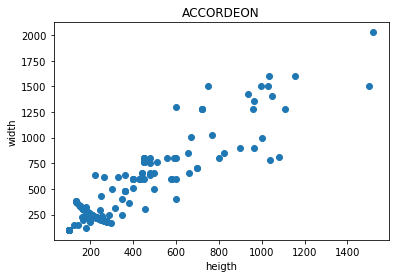

WIDTH
	min: 100.00
	max: 2028.00
	mean: 354.42
	std: 299.10
	variance: 89459.84
Sum:  125819
HEIGTH
	min: 100.00
	max: 1521.00
	mean: 282.83
	std: 220.18
	variance: 48478.56
Sum:  100404


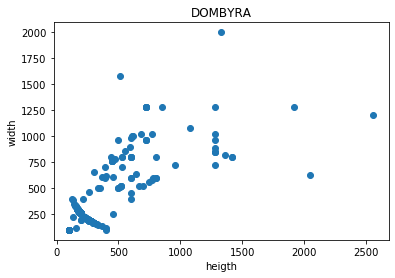

WIDTH
	min: 100.00
	max: 2000.00
	mean: 352.58
	std: 273.88
	variance: 75011.48
Sum:  135040
HEIGTH
	min: 100.00
	max: 2560.00
	mean: 318.18
	std: 295.97
	variance: 87596.46
Sum:  121863


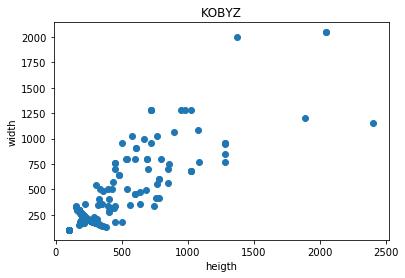

WIDTH
	min: 100.00
	max: 2048.00
	mean: 348.21
	std: 307.92
	variance: 94814.18
Sum:  105159
HEIGTH
	min: 100.00
	max: 2404.00
	mean: 345.58
	std: 321.77
	variance: 103538.12
Sum:  104366


In [445]:
for d in ["accordeon","dombyra","kobyz"]:
    dr = 'C:/Users/admin/Desktop/3rd Course/2ML/final/instrumentos1/'+d
    images = []
    for filename in os.listdir(dr):
        img = cv2.imread(os.path.join(dr,filename))
        if img is not None:
            images.append(img)
    hs = []
    ws = []
    for i in images:
        h, w, c = i.shape 
        hs.append(h)
        ws.append(w)
    plt.scatter(hs, ws)

    plt.xlabel('heigth')
    plt.ylabel('width')

    plt.title(d.upper())

    plt.show()
    print("WIDTH\n\tmin: {:0.2f}\n\tmax: {:0.2f}\n\tmean: {:0.2f}\n\tstd: {:0.2f}\n\tvariance: {:0.2f}"
          .format(np.min(ws),np.max(ws),np.mean(ws),np.std(ws),np.var(ws)))
    print("Sum: ",np.sum(ws))
    print("HEIGTH\n\tmin: {:0.2f}\n\tmax: {:0.2f}\n\tmean: {:0.2f}\n\tstd: {:0.2f}\n\tvariance: {:0.2f}"
          .format(np.min(hs),np.max(hs),np.mean(hs),np.std(hs),np.var(hs)))
    print("Sum: ",np.sum(hs))


### Dominant colors in each class

In [150]:
def visualize_colors(cluster, centroids):
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

ACCORDEON
[193.38943633  68.49818187  41.53588234] 6.48%
[91.13278221 85.799212   91.10729684] 14.95%
[181.72123996 172.95282534 160.65508761] 19.82%
[30.0700763  22.64016095 23.58114744] 26.95%
[247.72804849 247.35153871 246.1625726 ] 31.80%


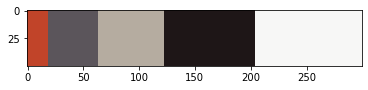

DOMBYRA
[31.56995393 23.19746961 21.10852632] 14.02%
[103.32214576  82.77117863  70.43832921] 16.13%
[203.9636126  196.81469658 182.1276488 ] 17.62%
[155.22692932 147.53205921 127.61981221] 21.10%
[248.81929472 248.19564563 247.78874455] 31.14%


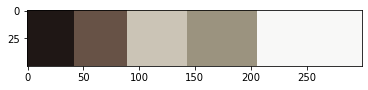

KOBYZ
[ 95.55457854 190.60631495 226.42403318] 3.73%
[50.10592603 35.28275851 33.89623413] 16.57%
[196.04191495 184.52875356 167.71880159] 17.18%
[138.15137483 109.35032776  87.5440352 ] 17.64%
[248.56779353 248.04622191 247.20127518] 44.88%


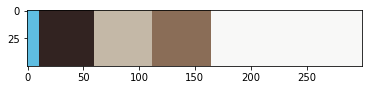

Wall time: 33min 56s


In [230]:
%%time
for d in ["accordeon","dombyra","kobyz"]:
    dr = 'C:/Users/admin/Desktop/3rd Course/2ML/final/instrumentos/'+d
    images = []
    for filename in os.listdir(dr):
        img = cv2.imread(os.path.join(dr,filename))
        if img is not None:
            images.append(img)
            
    print(d.upper())
    
    
    #Load image and convert to a list of pixels
    reshape = []
#     im = round(len(images)*0.3)
    for image in images:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        reshape.append(image.reshape((image.shape[0] * image.shape[1], 3)))
    reshaped = cv2.vconcat(reshape)
    
#     print(reshaped.shape)

    # Find and display most dominant colors
    cluster = KMeans(n_clusters=5).fit(reshaped)
    visualize = visualize_colors(cluster, cluster.cluster_centers_)
    visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
    plt.imshow(cv2.cvtColor(visualize, cv2.COLOR_BGR2RGB))
    plt.show()

as we see indeed each class has it's own domimnant colors, i assume that white is the most popular because of background

# Training models

In [311]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy

import tensorflow_hub as hub
import PIL

In [470]:
def plot_result(history):
    acc = history.history['accuracy']
    
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    

    plt.figure(figsize=(16, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

### Custom architecture

In [337]:
img_height, img_width, batch_size = 224, 224, 32

In [411]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'C:/Users/admin/Desktop/3rd Course/2ML/final/instrumentos1',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1065 files belonging to 3 classes.
Using 852 files for training.


In [412]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'C:/Users/admin/Desktop/3rd Course/2ML/final/instrumentos1',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1065 files belonging to 3 classes.
Using 213 files for validation.


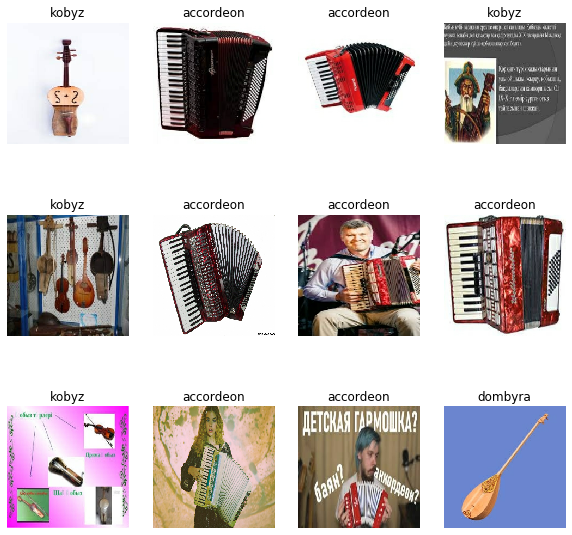

In [413]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [414]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [415]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [416]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3)
])

In [417]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [418]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 28, 28, 64)      

In [419]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
27/27 [==============================] - 17s 529ms/step - loss: 1.5332 - accuracy: 0.4183 - val_loss: 0.8588 - val_accuracy: 0.6244
Epoch 2/10
27/27 [==============================] - 13s 498ms/step - loss: 0.7161 - accuracy: 0.6985 - val_loss: 0.7682 - val_accuracy: 0.6479
Epoch 3/10
27/27 [==============================] - 13s 492ms/step - loss: 0.6120 - accuracy: 0.7414 - val_loss: 0.7583 - val_accuracy: 0.6854
Epoch 4/10
27/27 [==============================] - 14s 525ms/step - loss: 0.4401 - accuracy: 0.8193 - val_loss: 0.7204 - val_accuracy: 0.6995
Epoch 5/10
27/27 [==============================] - 14s 503ms/step - loss: 0.3124 - accuracy: 0.8820 - val_loss: 0.9498 - val_accuracy: 0.7230
Epoch 6/10
27/27 [==============================] - 14s 507ms/step - loss: 0.1912 - accuracy: 0.9374 - val_loss: 1.1212 - val_accuracy: 0.6948
Epoch 7/10
27/27 [==============================] - 14s 506ms/step - loss: 0.1571 - accuracy: 0.9483 - val_loss: 1.3219 - val_accuracy: 0.7042

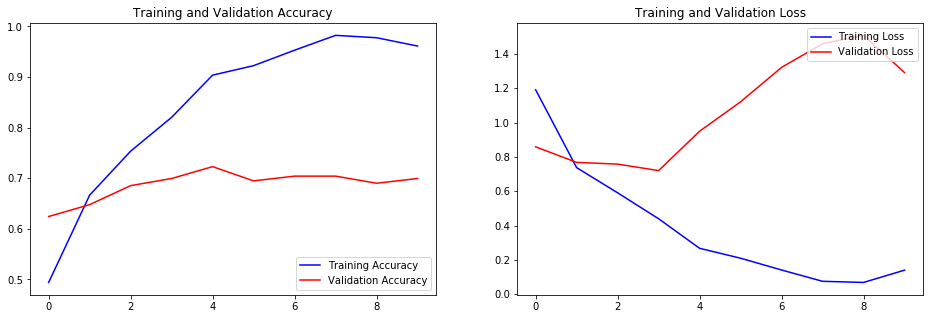

In [438]:
plot_result(history)

## Mobilenet

In [447]:
mobile = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=(224,224,3))
mobile.trainable = False

In [466]:
model = Sequential([
    mobile,
    Dense(3)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [467]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1001)              3540265   
_________________________________________________________________
dense_40 (Dense)             (None, 3)                 3006      
Total params: 3,543,271
Trainable params: 3,006
Non-trainable params: 3,540,265
_________________________________________________________________


In [468]:
history = model.fit(  
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
27/27 [==============================] - 15s 533ms/step - loss: 1.3385 - accuracy: 0.4168 - val_loss: 1.0222 - val_accuracy: 0.6197
Epoch 2/10
27/27 [==============================] - 14s 513ms/step - loss: 0.7253 - accuracy: 0.6775 - val_loss: 0.8432 - val_accuracy: 0.6432
Epoch 3/10
27/27 [==============================] - 14s 514ms/step - loss: 0.6183 - accuracy: 0.7267 - val_loss: 0.8005 - val_accuracy: 0.6526
Epoch 4/10
27/27 [==============================] - 14s 530ms/step - loss: 0.6085 - accuracy: 0.7277 - val_loss: 0.7939 - val_accuracy: 0.6526
Epoch 5/10
27/27 [==============================] - 14s 532ms/step - loss: 0.5340 - accuracy: 0.7649 - val_loss: 0.7690 - val_accuracy: 0.6385
Epoch 6/10
27/27 [==============================] - 14s 527ms/step - loss: 0.5443 - accuracy: 0.7703 - val_loss: 0.7484 - val_accuracy: 0.6526
Epoch 7/10
27/27 [==============================] - 14s 529ms/step - loss: 0.5074 - accuracy: 0.7722 - val_loss: 0.7310 - val_accuracy: 0.6854

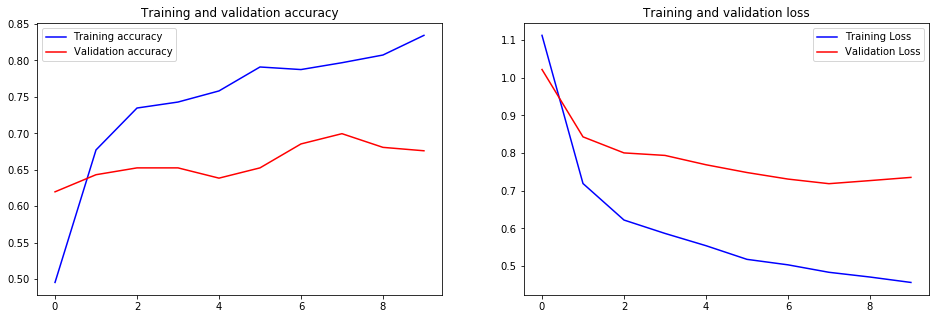

In [471]:
plot_result(history)

<h3>Conclusion:</h3> we were given a dataset with images of 3 classes, most of which had incompadible file format, I did some cleaning work with images then made a brief analisys, after that i trained 2 models, one custom build and one pre-trained, from the results i can say that custom model is performing a little better.